hipotesis_ regimenes de deformaciones pequeñas. Entonces el módulo dinámico es igual al estático.

Despreciamos las deformaciones trasversales



In [1]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np
from scipy import fftpack
from scipy.signal import find_peaks  
import pandas as pd


In [2]:
def MakeSpectralPlot(y, Fs, fignum=1):
    
    yfft = fftpack.fft(y)
    N = len(y)
    xf = np.linspace(0, Fs/2, int(N/2))
    yf = 2.0/N * np.abs(yfft[:N//2])
    PosicionPicos, IntensidadPicos = find_peaks(yf, height=yf[0])
    #print(PosicionPicos)
    #print(IntensidadPicos)
#    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
    plt.figure(fignum)
    plt.clf()
    plt.semilogx(xf, yf)
    #plt.plot(xf,yf)
    plt.xlabel('Frecuencias (MHz)')
    plt.ylabel('Amplitud (AU)')
    plt.title('Descomposición espectral del ruido')
    #plt.xlim(1,10)
    return xf, yf


### Actividad 3.1

Calcular la transformada rápida de Fourier (FFT) de las siguientes funciones:

$v(t) = |cos(2 \pi f t)|$

$v(t) = |cos(2 \pi f t)| + 0.2$

$v(t) = |cos(2 \pi f t)| ^{2} + 0.2$

Para ello, deberán muestrear las funciones.
Evaluar el resultado del módulo de la FFT de acuerdo a distintas duraciones y
frecuencia de muestreo

In [3]:
#matplotlib.use('TkAgg')
%matplotlib qt
t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 45

V = np.abs(np.cos(2*np.pi*f0*t)) 

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
plt.figure(figsize = (9, 7.5))
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

Frecuencia: 45.22507291527155


In [4]:
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 45

V = np.abs(np.cos(2*np.pi*f0*t)) + 0.2

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 44.79753020563653


In [5]:
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 45

V = np.abs(np.cos(2*np.pi*f0*t))**2 + 0.2

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 44.79753020563653


### Actividad 3.2

Generar una señal correspondiente a la vibración ideal sin amortiguamiento de
una barra en voladizo, considerando sus tres primero modos:

$ v(t) = A_{1} sin(\omega_1 t) + A_2 sin(\omega_2 t + \phi) + A_3 sin( \omega_3 t + \phi)$

$\omega_i = (\frac{\beta_i L}{L})^2 \sqrt{\frac{E I{zz}}{\rho A}}$

In [114]:
def w_i(betaL):
    r = 2.3 * 0.001 #m
    L = 255 * 0.001 #m
    E = 91.7 * 1e+9 #Pa
    rho = 8400 # kg/m3
    A = np.pi * r**2
    I = (np.pi * r**4 )/4
    zeta=0.1
    
    w_i = (betaL/L)**2 * np.sqrt( (E * I * (1-zeta**2) ) / (rho * A) )
    return w_i

betaL_i = [1.875, 4.694, 7.854]
w = []
for i,b in enumerate(betaL_i):
    w.append(w_i(b))
    print(f' La frecuencia del modo {i+1} es {w_i(b)/(2*np.pi)} Hz')


 La frecuencia del modo 1 es 32.531401772381884 Hz
 La frecuencia del modo 2 es 203.88552966326534 Hz
 La frecuencia del modo 3 es 570.7974537251092 Hz


In [9]:
%matplotlib qt
t = np.linspace(0, 30, 500000)
tstep = max(t)/len(t) 
fsamp = 1/tstep

A1 = 1
A2 = 1
A3 = 1
w1 = w[0]
w2 = w[1]
w3 = w[2]
phi = 0

V = A1 * np.sin(w1 *t) + A2 * np.sin(w2 *t + phi) + A3 * np.sin(w3 *t + phi)

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)
#plt.xlim(0,1000)

f_ = np.array(plt.ginput(3))
print(w)
print(f'Frecuencias: w1: {f_[0][0] }, w2: {f_[1][0]} , w3: {f_[2][0]} ')

[308.0776764679375, 1930.829193392441, 5405.54491035605]
Frecuencias: w1: 49.268149876441676, w2: 304.3714088512101 , w3: 866.3927642724457 


### Actividad 3.3
Se presentan distintas capturas de series temporales realizadas con un osciloscopio
que permitía registrar series de datos de 30k puntos. Las series corresponden a la
oscilación vertical libre de una barra en voladizo. 3 de las series corresponden a una
barra de acero y 4 a una barra de latón

Analizar las series y obtener el valor del módulo de Young de cada material.
Discutir la calidad de los datos al compararlos con una serie temporal ideal con
amortiguamiento:

http://materias.df.uba.ar/l4a2021c1/files/2021/03/actividades_clase_03.pdf


$v_i (x_p , t) = A_p e^{\zeta \omega_i T} sin(\omega_{i,d} t + \phi)$

$\delta = \tau \omega_i T = ln(\frac{v_i(x,t)}{v_i(x,t+T)})$

$\omega_{i,d} = \omega_i \sqrt{1 - \zeta^2} \Leftarrow \zeta = \frac{\delta}{\omega_i T}$

### CASO IDEAL

In [8]:
def w_id(damp,w_i):
    w_ = w_i * np.sqrt(1-damp)
    return w_ 
damp = 0.6
print(w_id(damp,w1) , w_id(damp,w2) , w_id(damp,w3) )
print(w)

194.8454307782281 1221.1636047731695 3418.766782211165
[308.0776764679375, 1930.829193392441, 5405.54491035605]


In [9]:
t = np.linspace(0, 30, 500000)
tstep = max(t)/len(t) 
fsamp = 1/tstep

A1 = 1
A2 = 1
A3 = 1
w1 = w[0]
w2 = w[1]
w3 = w[2]
phi = 0

V = A1 * np.sin(w1 *t) + A2 * np.sin(w2 *t + phi) + A3 * np.sin(w3 *t + phi)

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)
#plt.xlim(0,1000)

print(w)
f_ = np.array(plt.ginput(3))

print(f'Frecuencias: w1: {f_[0][0] }, w2: {f_[1][0] } , w3: {f_[2][0]} ')

[308.0776764679375, 1930.829193392441, 5405.54491035605]
Frecuencias: w1: 49.033346403120106, w2: 312.66448324750576 , w3: 869.766596479304 


305.0552638338528 1911.886689621071 5352.5135209399705


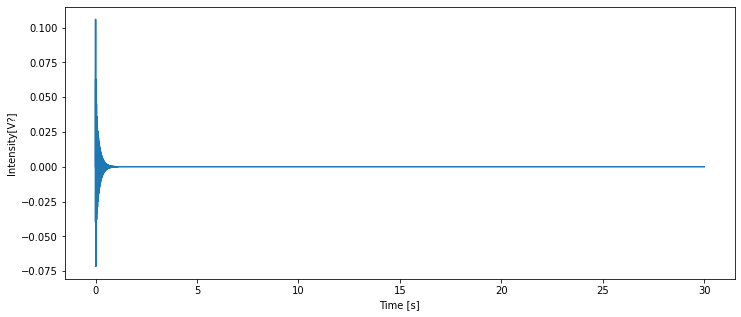

In [10]:
%matplotlib inline
t = np.linspace(0, 30, 30000)
tstep = max(t)/len(t) 
fsamp = 1/tstep

A1 = 0.05
A2 = 0.05
A3 = 0.05
w1 = w[0]
w2 = w[1]
w3 = w[2]
phi = 0
damp = 0.019524860727455132

def T(w):
    T_ = 2 * np.pi / w
    return T_

V =  A1 * np.sin( w_id(damp,w1) *t) * np.exp(-damp * t * w1) + A2 * np.sin(w_id(damp,w2) *t + phi) * np.exp(-damp * t * w2)+ A3 * np.sin(w_id(damp,w3) *t + phi)  * np.exp(-damp * t * w3) 

plt.figure(2,figsize = (12,5))
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')

#MakeSpectralPlot(V, fsamp)


print(w_id(damp,w1) , w_id(damp,w2) , w_id(damp,w3) )
#f_ = np.array(plt.ginput(3))
#print(f'Frecuencias: w1: {f_[0][0] * 2 * np.pi}, w2: {f_[1][0] * 2 * np.pi} , w3: {f_[2][0] * 2 * np.pi} ')

### CASO REAL

#### ACERO

In [3]:
import os
import re 

files = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if 'acero' in os.path.splitext(k)[0] or 'laton' in os.path.splitext(k)[0]}


for i,file in enumerate(os.listdir('data')):
    name = os.path.splitext(file)[0]
    if 'acero' in name or 'laton' in name:
        f = open(f'data/{file}').read().split()[7:]
        t = [float(f[i]) for i in range(0,len(f),2)]
        v = [float(f[i + 1]) for i in range(0,len(f),2)]
        files[name]['t'] = np.array(t)
        files[name]['v'] = np.array(v)

  

In [11]:
t = files['acero_3']['t'][1000:]
v = files['acero_3']['v'][1000:]

tor = files['acero_3']['t']
vor = files['acero_3']['v']

# arreglo un poco
vor=vor-np.median(vor)
v = v - np.median(v) #corro el 0
t= np.linspace(0, len(t)/1000, len(t))

Text(0, 0.5, 'Signal [V]')

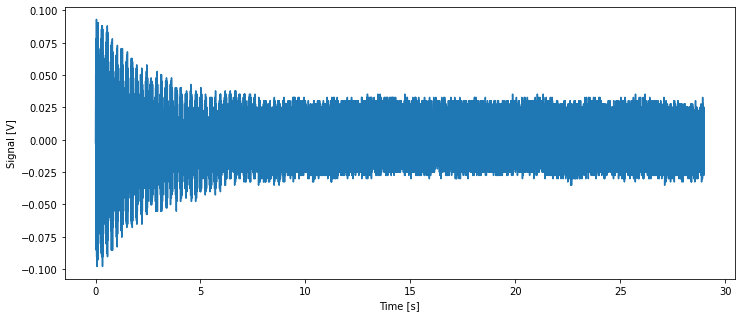

In [14]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure(figsize = (12,5))
plt.clf()
plt.plot(t,v)
plt.xlabel("Time [s]")
plt.ylabel("Signal [V]")



Text(0, 0.5, 'Signal [V]')

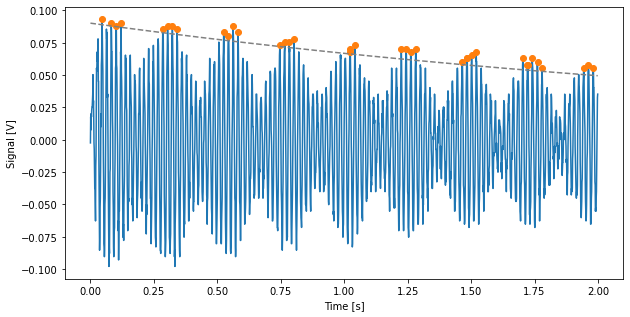

In [16]:
%matplotlib inline
f = 0.09 * np.exp(-0.3 * t[0:2000])
peaks, _ = find_peaks(v[0:2000], height = f)

plt.figure(figsize = (10,5))
plt.plot(t[0:2000],v[0:2000])
plt.plot(t[peaks], v[peaks], "o")
plt.plot(t[0:2000], f, '--',color = 'grey')
plt.xlabel("Time [s]")
plt.ylabel("Signal [V]")



[1.9272627, 1.0581412592592587, 0.6707235999999995, 0.45970949999999977, 0.4479863333333327]
T es: 0.8614572866714605


ValueError: x and y must have same first dimension, but have shapes (2000,) and (8000,)

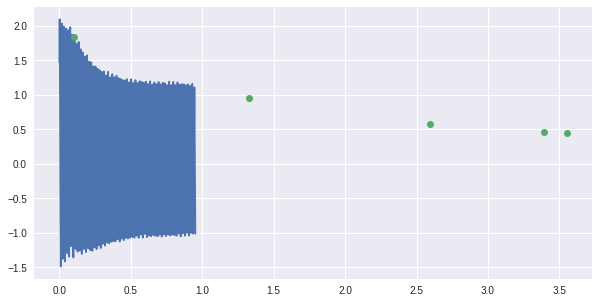

In [73]:
def peaks_(peaks):
    maximos = []
    puntos = []
    coord = []

    for i in range(len(peaks)-1):
        if (t[peaks[i+1]] - t[peaks[i]]) < 0.05:
            if v[peaks[i]] != np.nan:
                puntos.append(v[peaks[i]])
        else:
            coord.append(peaks[i-2])
            maximos.append(np.mean(puntos))
            puntos = []
    print(maximos)
    
    return maximos, coord

def delta(maximos):
    cocientes = []
    
    for m in range(1,len(maximos)):
        cociente = maximos[m-1]/(maximos[m])  
        cocientes.append(cociente)
    
    cocientes = np.array(cocientes)
    print(cocientes)
    m_ = np.linspace(1,len(cocientes),len(cocientes))
    delta = np.mean(np.log(np.array(cocientes))/m_)
    print(delta)
    return delta

maximos, coord = peaks_(peaks)
print(f'T es: {np.mean(np.diff(t[coord]))}')
plt.figure(figsize = (10,5))
plt.plot(t[0:2000],v[0:2000])
plt.plot(t[coord], v[coord], "o")
plt.plot(t[0:2000], f, '--',color = 'grey')
plt.xlabel("Time [s]")
plt.ylabel("Signal [V]")


In [18]:
delta_ = delta(maximos)
damp = delta_/np.sqrt(4 * np.pi + delta_**2)
print(f'delta es {delta_} +- {np.std(np.log(np.diff(peaks)))} s')
print(f'damp es {damp}')

[1.03846831 1.03999904 1.12359219 1.0787856  0.99397608 1.10666327
 1.04166528]
0.019524860727455132
delta es 0.019524860727455132 +- 1.209126645030627 s
damp es 0.00550777797849957


In [19]:
%matplotlib inline
def MakeSpectral(y, Fs, fignum=1):
    
    yfft = fftpack.fft(y)
    N = len(y)
    xf = np.linspace(0, Fs/2, int(N/2))
    yf = 2.0/N * np.abs(yfft[:N//2])
    #print(PosicionPicos)
    #print(IntensidadPicos)
#    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
    return xf, yf


fsamp = 1/0.001
vv=np.array_split(vor,100)
L=[]
Lx=[]
s=MakeSpectral(vv,fsamp)
s0=s[0]
for i in range(100):
    l=MakeSpectral(vv[i], fsamp)
    
    L.append(l[1])

In [20]:
%matplotlib qt
from matplotlib.colors import LogNorm
plt.figure(figsize = (9, 7.5))
nparr=np.linspace(0,150,len(s0))
lis=[]
liss0=[]
for i in range(len(s0)):
    lis.append(nparr[i])
    liss0.append(s0[i])

plt.imshow(L, norm=LogNorm())
plt.xticks([lis[0],14.7,lis[10],lis[20],lis[30],lis[39],lis[49]],[0,50,100,200,300,400,500])
plt.xlabel(r'$\omega$ (Hz)',fontsize=16)
plt.ylabel(r'$\tau$ (0.03 s)',fontsize=16)
plt.tight_layout()
plt.show()
  

In [21]:
3/100

0.03

In [150]:
print(len(lis),len(liss0))

50 50


#### LATON

In [67]:
t = files['laton_3']['t']
v = files['laton_3']['v']

print

tor = files['laton_3']['t']
vor = files['laton_3']['v']

vor=vor-np.median(vor)

# arreglo un poco
v = v - np.median(v) #corro el 0
t= np.linspace(0, len(t)/2100, len(t))

In [2]:
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:

%matplotlib inline
plt.figure(figsize = (10,7))
from scipy.signal import find_peaks
plt.figure(figsize = (12,5))
plt.clf()
plt.plot(t,v)
plt.xlabel("Tiempo [s]",fontsize=16)
plt.ylabel("Señal [V]",fontsize=16)
plt.savefig("DatosBruto")



NameError: name 't' is not defined

<Figure size 720x504 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 720x504 with 0 Axes>

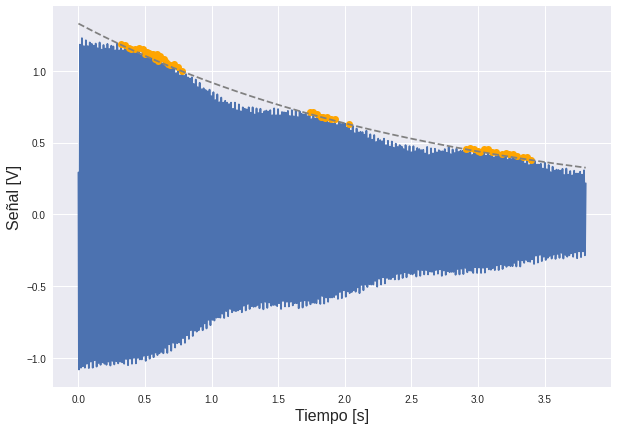

In [63]:
%matplotlib inline
plt.figure(figsize = (10,7))
t_ = t[0:8000]
v_ = v[0:8000]
f = 1.33* np.exp(-0.37 * t_ )
peaks, _ = find_peaks(v_, height = f)

plt.figure(figsize = (10,7))
plt.plot(t_,v_)
plt.plot(t[peaks], v[peaks], "o",color='orange')
plt.plot(t_, f, '--',color = 'grey')
plt.xlabel("Tiempo [s]",fontsize=16)
plt.ylabel("Señal [V]",fontsize=16)
plt.savefig("DatosComp")



[1.1106791818181814, 0.6849586666666663, 0.4330186874999995]


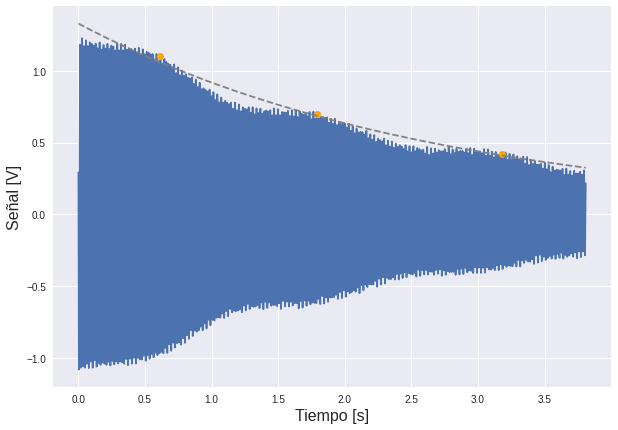

In [65]:
#(t[peaks[i+1]] - t[peaks[i]])
def peaks_(peaks):
    maximos = []
    puntos = []
    coord = []
    
    peaks=peaks.tolist()
    peaks.append(peaks[-1]+5000)
    for i in range(len(peaks)-1):
        if (t[peaks[i+1]]-t[peaks[i]]) < 0.8:
            if v[peaks[i]] != np.nan:
                puntos.append(v[peaks[i]])
        else:
            coord.append(peaks[i-7])
            maximos.append(np.mean(puntos))
            puntos = []
    print(maximos)
    
    return maximos, coord

def delta(maximos):
    cocientes = []
    
    for m in range(1,len(maximos)):
        cociente = maximos[m-1]/(maximos[m])  
        cocientes.append(cociente)
    
    cocientes = np.array(cocientes)
    print(cocientes)
    m_ = np.linspace(1,len(cocientes),len(cocientes))
    delta = np.mean(np.log(np.array(cocientes))/m_)
    print(delta)
    return delta


maximos, coord = peaks_(peaks)

%matplotlib inline

plt.figure(figsize = (10,7))
plt.plot(t_,v_)
plt.plot(t[coord], v[coord], "o", color='orange')
plt.plot(t_, f, '--',color = 'grey')
plt.xlabel("Tiempo [s]",fontsize=16)
plt.ylabel("Señal [V]",fontsize=16)
plt.savefig("DatosComp2")

In [60]:
delta_ = delta(maximos)
damp = delta_/np.sqrt(4 * np.pi + delta_**2)
print(f'delta es {delta_} +- {np.std(np.log(np.diff(peaks)))} s')
print(f'damp es {damp}')

[1.62152731 1.58182242]
0.35632864607966297
delta es 0.35632864607966297 +- 0.8275458201376915 s
damp es 0.10001445410712212


In [99]:
%matplotlib inline
def MakeSpectral(y, Fs, fignum=1):
    
    yfft = fftpack.fft(y)
    N = len(y)
    xf = np.linspace(0, Fs/2, int(N/2))
    yf = 2.0/N * np.abs(yfft[:N//2])
    #print(PosicionPicos)
    #print(IntensidadPicos)
#    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
    return xf, yf


fsamp = 1/0.001
vv=np.array_split(vor,100)
L=[]
Lx=[]
s=MakeSpectral(vv,fsamp)
s0=s[0]
for i in range(100):
    l=MakeSpectral(vv[i], fsamp)
    
    L.append(l[1])

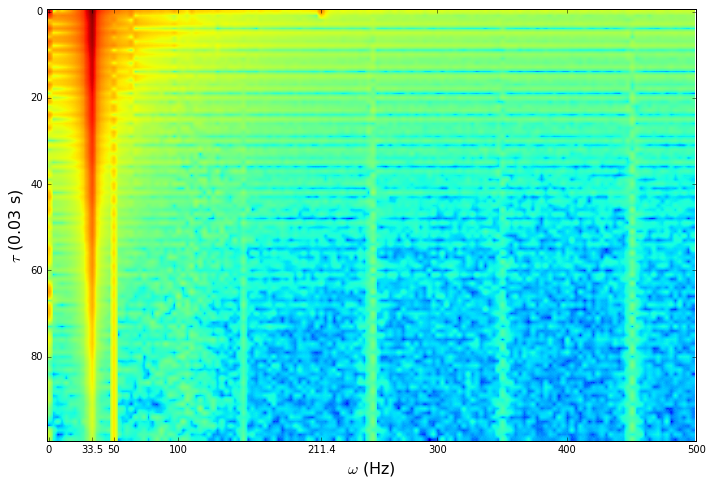

In [101]:
plt.style.use("classic")
%matplotlib inline
from matplotlib.colors import LogNorm
plt.figure(figsize = (10, 7))
nparr=np.linspace(0,150,len(s0))
lis=[]
liss0=[]
for i in range(len(s0)):
    lis.append(nparr[i])
    liss0.append(s0[i])

plt.imshow(L,norm=LogNorm())
esa=210.5*3/10
esa2=33.5*3/10
#plt.axvline(esa,color='k')
#plt.axvline(esa2,color='k')

plt.xticks([0,33.5*3/10,50*3/10,100*3/10,210.5*3/10,300*3/10,400*3/10,500*3/10],[0,33.5,50,100,211.4,300,400,500])
plt.xlabel(r'$\omega$ (Hz)',fontsize=16)
plt.ylabel(r'$\tau$ (0.03 s)',fontsize=16)
plt.tight_layout()
plt.savefig("ColoresFuertes")

In [97]:
%matplotlib qt
MakeSpectralPlot(vv[0],fsamp)

(array([  0.        ,   3.3557047 ,   6.7114094 ,  10.06711409,
         13.42281879,  16.77852349,  20.13422819,  23.48993289,
         26.84563758,  30.20134228,  33.55704698,  36.91275168,
         40.26845638,  43.62416107,  46.97986577,  50.33557047,
         53.69127517,  57.04697987,  60.40268456,  63.75838926,
         67.11409396,  70.46979866,  73.82550336,  77.18120805,
         80.53691275,  83.89261745,  87.24832215,  90.60402685,
         93.95973154,  97.31543624, 100.67114094, 104.02684564,
        107.38255034, 110.73825503, 114.09395973, 117.44966443,
        120.80536913, 124.16107383, 127.51677852, 130.87248322,
        134.22818792, 137.58389262, 140.93959732, 144.29530201,
        147.65100671, 151.00671141, 154.36241611, 157.71812081,
        161.0738255 , 164.4295302 , 167.7852349 , 171.1409396 ,
        174.4966443 , 177.85234899, 181.20805369, 184.56375839,
        187.91946309, 191.27516779, 194.63087248, 197.98657718,
        201.34228188, 204.69798658, 208.

In [100]:
300*0.001

0.3